# 機械学習/2025/07/10

- 平均の実装
- 分散の実装
- 標準偏差の実装


## 平均の実装

- データの中心（重心）を示す値

$$
Mean = \frac{1}{n} \sum_{i=1}^n x_i
$$

In [ ]:
scores1 = [70, 90, 50, 80, 60]
scores2 = [70, 80, 60, 75, 65]

In [ ]:
# 平均を計算する関数my_mean
def my_mean(numbers):
  total = 0
  for number in numbers:
    total += number
  mean = total / len(numbers)
  return mean

In [ ]:
scores1_mean = my_mean(scores1)
scores2_mean = my_mean(scores2)
print("scores1 mean:", scores1_mean)
print("scores2 mean:", scores2_mean)

scores1 mean: 70.0
scores2 mean: 70.0


## 分散の実装

- データのばらつきを示す値

$$
Variance = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

> 数式の書き方を LaTex（ラテフ）と呼びます

In [ ]:
# 自分で実装してみてください

def my_variance(numbers):
  mean = my_mean(numbers)
  total = 0
  for number in numbers:
    total += (number - mean)**2
  variance = total / len(numbers)

  return variance

In [ ]:
scores1_variance = my_variance(scores1)
scores2_variance = my_variance(scores2)
print("scores1 variance:", scores1_variance)
print("scores2 variance:", scores2_variance)

scores1 variance: 200.0
scores2 variance: 50.0


### 分散のまとめ

- scores1 の分散は 200
- scores2 の分散は 50
- よって、scores1 の方が、scores2よりばらつき（分散）が大きい


#### 補足：分散の弱点

- 分散は、計算の中で、2乗しているので、値が大きくなりやすい
- つまり、分散の値だけ見ても、意味を理解するのが難しい
- そのため、人間が理解しやすいように、分散から標準偏差に置き換える


## 標準偏差の実装

- ひょうじゅんへんさ
- 分散と同様に、データのばらつきを示す値
- 分散の平方根（1/2乗）

> 標準偏差は、英語で、Standard Deviation と呼びます

$$
STD = \sqrt{Variance}
$$


In [ ]:
def my_std(numbers):
  variance = my_variance(numbers) # 分散
  std = variance ** 0.5
  return std

In [ ]:
scores1_std = my_std(scores1)
scores2_std = my_std(scores2)

print("scores1 std:", scores1_std)
print("scores2 std:", scores2_std)

scores1 std: 14.142135623730951
scores2 std: 7.0710678118654755


## 度数分布表とヒストグラム

### 度数分布表（どすうぶんぷひょう）

- 度数（どすう）：データの出現回数
- 度数分布表：度数の分布を表にしたもの

#### 例

```
scores5 = [85, 71, 74, 48, 86, 59, 63, 71, 71, 39,  
           64, 61, 73, 64, 75, 57, 59, 63, 58, 63,
           49, 64, 59, 57, 58, 48, 64, 61, 63, 49]
```

- 度数分布表

|階級（かいきゅう） |度数 |
|:-- |:-- |
|0 - 9|   0|
|10 - 19| 0|
|20 - 29| 0|
|30 - 39| 1|
|40 - 49| 4|
|50 - 59| 7|
|60 - 69| 10|
|70 - 79| 6|
|80 - 89| 2|
|90 - 100| 0|

> 階級（かいきゅう）とは、データを区切る範囲のことです。最後の階級のみ、90 - 100になっている点に注意してください

In [ ]:
scores5 = [85, 71, 74, 48, 86, 59, 63, 71, 71, 39,
           64, 61, 73, 64, 75, 57, 59, 63, 58, 63,
           49, 64, 59, 57, 58, 48, 64, 61, 63, 49]

In [ ]:
# 度数分布表を出力する関数
# frequency = 度数 = データの出現回数
def my_frequency(numbers):
  width = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
  for i in range(len(width)):

    # 最後の1周は処理しない
    if i == len(width) - 1:
      break

    w1 = width[i]

    if i == len(width) - 2:
      w2 = width[i + 1]
    else:
      w2 = width[i + 1] - 1

    frequency = 0
    for number in numbers:
      if w1 <= number and number <= w2:
        frequency += 1

    print(f"{w1} - {w2}: {frequency}")

In [ ]:
my_frequency(scores5)

0 - 9: 0
10 - 19: 0
20 - 29: 0
30 - 39: 1
40 - 49: 4
50 - 59: 7
60 - 69: 10
70 - 79: 6
80 - 89: 2
90 - 100: 0


### ヒストグラム

- 度数分布表を、棒グラフにしたもの
- 度数（出現回数）をグラフに出力する

> 今回は、matplotlibというグラフ表示ライブラリを使います

In [ ]:
import matplotlib.pyplot as plt

def my_histogram(numbers):
  width = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
  plt.grid()
  plt.hist(numbers, bins=width)
  plt.show()

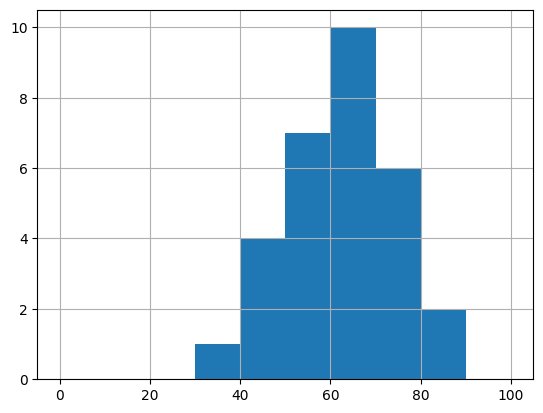

In [ ]:
my_histogram(scores5)

## 参考：箱ひげ図

- ヒストグラムと同様にデータの分布を確認する図
- 英語でBox Plotと呼ぶ

- 箱の中の線は、50%点（中央値）を意味する
- 箱の上段、下段は、75%、25%点を意味する
- ひげの上段、下段は、100%、0%点（最大値、最小値）を意味する

> IQR（四分位範囲）の1.5倍を超えたものを、外れ値として表示する（※あとで確認します）

In [ ]:
def my_box_plot(numbers):
  plt.boxplot(numbers)
  plt.show()

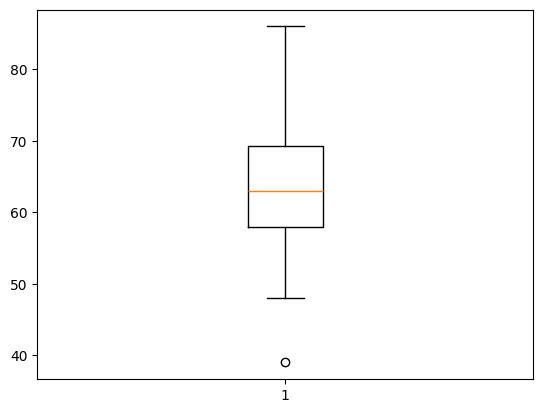

In [ ]:
my_box_plot(scores5)

# 参考：次回の内容

- 線形回帰アルゴリズム（Linear Regression）

- 次のような式があるとします

$$
y = 5 x + 10
$$

- この式における 5 の部分を係数（けいすう：Coefficient）と呼びます
- この式における 5 の部分を切片（せっぺん：Intercept）と呼びます

- 機械学習（線形回帰アルゴリズム）では、データから係数や切片を計算します


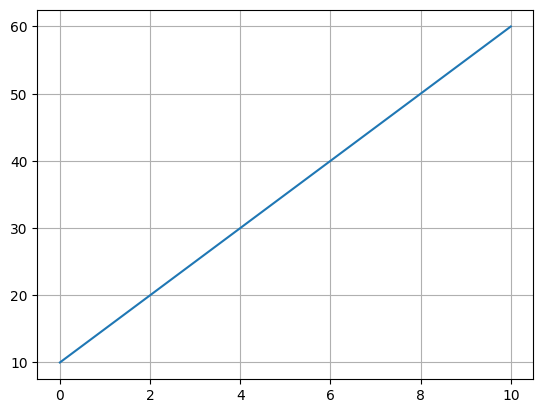

In [ ]:
# Pythonで y = 5x + 10 をグラフにする

import numpy as np

x = np.linspace(0, 10, 11)
y = 5 * x + 10

plt.grid()
plt.plot(x, y)
plt.show()

In [ ]:
# 次回はこんな感じの勉強をします

x = np.array([1, 2, 3, 4, 5 6, 7, 8, 9])
y = np.array([4.4, 7.2, 13.8, 11.9, 16.2, 21.2, 25.0, 24.2, 26.8])

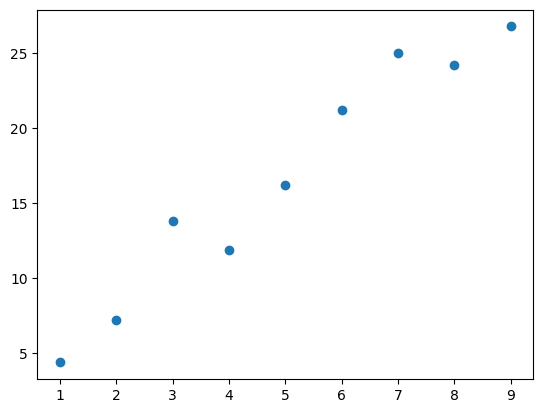

In [ ]:
plt.scatter(x, y)

In [ ]:
# 次回はscikit-learnという機械学習ライブラリを使います